### Car sales program:
##### Carry out the following tasks in JupyterLab using the prepared DataFrame from the previous chapter:
##### Conduct an elbow-test and determine the optimal number of clusters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
car_dropmodel_price = pd.read_csv("car_dropmodel_price.csv")
car_dropmodel_price

,Year,Make,Price,Category
0,2021,Acura,26100,Sedan
1,2021,Acura,38400,SUV
2,2021,Acura,37500,Sedan
3,2021,Alfa Romeo,40350,Sedan
4,2021,Alfa Romeo,42350,SUV
...,...,...,...,...
235,2021,Volvo,40950,Wagon
236,2021,Volkswagen,25245,SUV
237,2021,Volvo,33700,SUV
238,2021,Volvo,41700,SUV


Now, K-Means is an unsupervised machine learning method. This means there is no need for a train-test split. KMeans also allows you to use the ENTIRE dataset.

However, 1 thing we need to do is to normalize the data set, but only the numerical variables. We know that Price is the only numerical variable we want to normalize since normalizing year does not make sense

In [3]:
# Drop all the Price cells that have NA in them
car_clean_price = car_dropmodel_price.dropna(axis = 0, how = "any")
car_clean_price

,Year,Make,Price,Category
0,2021,Acura,26100,Sedan
1,2021,Acura,38400,SUV
2,2021,Acura,37500,Sedan
3,2021,Alfa Romeo,40350,Sedan
4,2021,Alfa Romeo,42350,SUV
...,...,...,...,...
235,2021,Volvo,40950,Wagon
236,2021,Volkswagen,25245,SUV
237,2021,Volvo,33700,SUV
238,2021,Volvo,41700,SUV


I like to keep checkpoint files - lets do that

In [4]:
car_clean_price.to_csv("car_preclean_price.csv", index = False)

I am interested in how many different "Make" categories I have. Similarly, I am interested in how many "Category" categories I have

In [5]:
len(car_clean_price["Make"].str.get_dummies(sep=', ').sum())

35

In [6]:
len(car_clean_price["Category"].str.get_dummies(sep=', ').sum())

8

In [7]:
lst1 = car_clean_price["Make"].unique().tolist()
lst2 = car_clean_price["Category"].unique().tolist() 

print(lst1)
print("\n")
print(lst2)

['Acura', 'Alfa Romeo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hyundai', 'INFINITI', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'MAZDA', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Polestar', 'Porsche', 'Ram', 'Rivian', 'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo']


['Sedan', 'SUV', 'Wagon', 'Convertible', 'Hatchback', 'Coupe', 'Pickup', 'Van']


#### What about the non-numerical data? Will that work in K-Means? The answer is NO!

##### We have to convert all non-numerical data to binary values using dummy variables.

Think about it - how does K-Means (which is based on euclidean distance) know how far the word "Audi" is from "Mercedes"?

In [8]:
# I originally tried this but the outcome was pretty messy. Have a go in any case

#X_km = pd.get_dummies(X_km)
#X_km_norm = pd.get_dummies(X_km_norm)

I am replacing all the variables in 'lst1' and 'lst2' with uniques numbers from 0 to n, and I do this by creating a dictionary "key-item" pair. The key (k) is the element in 'lst10/ 'lst2' and the item (v) will be an integer.

In [9]:
columns_rename1 = {k: v for v, k in enumerate(lst1)}
columns_rename1

{'Acura': 0,
 'Alfa Romeo': 1,
 'Audi': 2,
 'BMW': 3,
 'Buick': 4,
 'Cadillac': 5,
 'Chevrolet': 6,
 'Chrysler': 7,
 'Dodge': 8,
 'FIAT': 9,
 'Ford': 10,
 'Genesis': 11,
 'GMC': 12,
 'Honda': 13,
 'Hyundai': 14,
 'INFINITI': 15,
 'Jaguar': 16,
 'Jeep': 17,
 'Kia': 18,
 'Land Rover': 19,
 'Lexus': 20,
 'Lincoln': 21,
 'MAZDA': 22,
 'Mercedes-Benz': 23,
 'Mitsubishi': 24,
 'Nissan': 25,
 'Polestar': 26,
 'Porsche': 27,
 'Ram': 28,
 'Rivian': 29,
 'Subaru': 30,
 'Tesla': 31,
 'Toyota': 32,
 'Volkswagen': 33,
 'Volvo': 34}

In [10]:
columns_rename1 = {k: v for v, k in enumerate(lst1)}
columns_rename2 = {k: v for v, k in enumerate(lst2)}

car_clean_price = car_clean_price.replace({'Make':columns_rename1})
car_clean_price = car_clean_price.replace({'Category':columns_rename2})

car_clean_price

,Year,Make,Price,Category
0,2021,0,26100,0
1,2021,0,38400,1
2,2021,0,37500,0
3,2021,1,40350,0
4,2021,1,42350,1
...,...,...,...,...
235,2021,34,40950,2
236,2021,33,25245,1
237,2021,34,33700,1
238,2021,34,41700,1


In [11]:
# Again another check point file
car_clean_price.to_csv("car_clean_price.csv", index = False)

In [12]:
# Here all we are doing is selecting the column we want to normalize; 
# the other steps are just to note the column and row labels
numvar_list = ['Price']
DF_model_toNorm = car_clean_price[numvar_list]
DF_model_toNorm_colnam = list(DF_model_toNorm.columns.values)
DF_model_toNorm_rownam = list(DF_model_toNorm.index)
DF_model_toNorm

,Price
0,26100
1,38400
2,37500
3,40350
4,42350
...,...
235,40950
236,25245
237,33700
238,41700


In [13]:
# This normalizes the data set
scaler = preprocessing.StandardScaler()
scaler.fit(DF_model_toNorm)
DF_model_Norm = scaler.transform(DF_model_toNorm)

# Now we convert to a pandas array
car_norm_price = pd.DataFrame(DF_model_Norm, columns = DF_model_toNorm_colnam, index = DF_model_toNorm_rownam)
car_norm_price

,Price
0,-0.658700
1,-0.057832
2,-0.101798
3,0.037428
4,0.135130
...,...
235,0.066739
236,-0.700468
237,-0.287432
238,0.103377


I can now add this normalized data set to the dataframe I made earlier

In [14]:
# Now we recreate the original dataframe
car_norm_price = car_norm_price.add_suffix("_norm")
numnormvar_list = car_norm_price.columns.values
df_car_final = pd.concat([car_clean_price, car_norm_price], axis = 1)
df_car_final

,Year,Make,Price,Category,Price_norm
0,2021,0,26100,0,-0.658700
1,2021,0,38400,1,-0.057832
2,2021,0,37500,0,-0.101798
3,2021,1,40350,0,0.037428
4,2021,1,42350,1,0.135130
...,...,...,...,...,...
235,2021,34,40950,2,0.066739
236,2021,33,25245,1,-0.700468
237,2021,34,33700,1,-0.287432
238,2021,34,41700,1,0.103377


In [15]:
# First lets drop the normalized values for the elbow plot; the name is stored in "numnormvar_list"
X_km = df_car_final.drop(numnormvar_list, axis = 1)

# This second data set is for once we have optimized the number of clusters
X_km_norm = df_car_final.drop(numvar_list, axis = 1)

X_km_norm.columns = X_km_norm.columns.str.replace("_norm", "")
X_km_norm

,Year,Make,Category,Price
0,2021,0,0,-0.658700
1,2021,0,1,-0.057832
2,2021,0,0,-0.101798
3,2021,1,0,0.037428
4,2021,1,1,0.135130
...,...,...,...,...
235,2021,34,2,0.066739
236,2021,33,1,-0.700468
237,2021,34,1,-0.287432
238,2021,34,1,0.103377


##### Construct a K-Means clustering solution with the number of clusters obtained from the previous task.


### Lets start to do the elbow plot

In [16]:
distortions = []

min_el = 1
max_el = 10

# A loop runs thorugh your min and max clusters. 
# We dont complicate the K-Means at this stage
# We store an "intertia" number which is the measurement of the distortions in different K clustering solutions

for i in range (min_el,max_el):
    km = KMeans(n_clusters= i, init = "k-means++")
    km.fit(X_km)
    distortions.append(km.inertia_)    

Text(0.5, 1.0, 'Elbow for KMeans clustering')

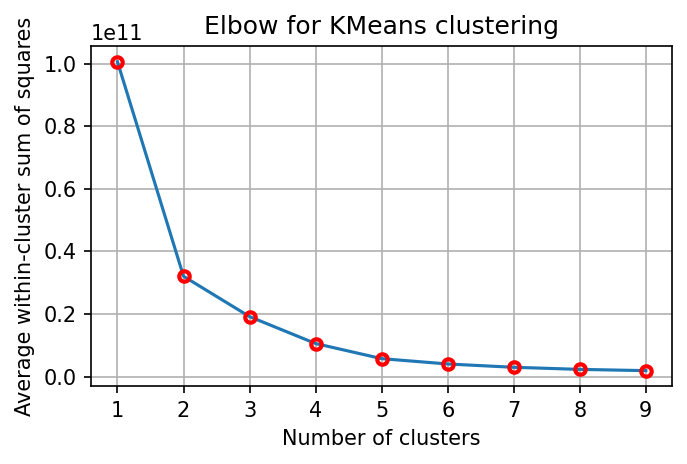

In [17]:
# elbow curve
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,3), dpi = 150)
plt.plot(range (min_el,max_el), distortions, marker='o', markersize=5,
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

#### Looks like 2 is the optimal number of clusters. Lets do the K means proper now

In [18]:
# Fitting the K-Means with the optimal number of cluster
k = 2
km = KMeans(n_clusters=k, init = "k-means++", random_state = 0)
km_fit = km.fit(X_km_norm)

# Predicting the Classificaiton of the Data
y_pred = km.fit_predict(X_km_norm)
display(y_pred)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

##### Explore the estimated clustering solution by cross-tabulating the cluster index with the clustering criteria.

In [19]:
# The predicted results should now be converted to a pandas dataframe

y_pred_data = pd.DataFrame({"cluster":y_pred},index = X_km_norm.index)
y_pred_data

,cluster
0,1
1,1
2,1
3,1
4,1
...,...
235,0
236,0
237,0
238,0


In [20]:
car_pred = pd.concat([X_km , y_pred_data ], axis = 1)
car_pred_norm = pd.concat([X_km_norm , y_pred_data ], axis = 1)
car_pred

,Year,Make,Price,Category,cluster
0,2021,0,26100,0,1
1,2021,0,38400,1,1
2,2021,0,37500,0,1
3,2021,1,40350,0,1
4,2021,1,42350,1,1
...,...,...,...,...,...
235,2021,34,40950,2,0
236,2021,33,25245,1,0
237,2021,34,33700,1,0
238,2021,34,41700,1,0


In [21]:
#car_pred[['Price', 'cluster']].groupby(by = ['cluster']).any().transpose()
pd.crosstab(car_pred['Price'], car_pred['cluster'], normalize='index', margins = True)

cluster,0,1
Price,,
13600,0.0000,1.0000
14980,1.0000,0.0000
15395,0.0000,1.0000
16050,0.0000,1.0000
17590,0.0000,1.0000
...,...,...
97300,1.0000,0.0000
99200,1.0000,0.0000
131750,1.0000,0.0000


##### Plot the clustering solution as a 2-dimensional scatter plot.

In [22]:
from sklearn.decomposition import PCA

pca = PCA(2)
df = pca.fit_transform(car_pred_norm)
df.shape

(240, 2)

In [23]:
filtered_label0 = df[y_pred == 0]
filtered_label1 = df[y_pred == 1]

filtered_label0

array([[ -1.19978767,  -1.11731933],
       [ -1.20581767,  -1.18072383],
       [ -1.20225665,  -1.14328023],
       [ -1.20026248,  -1.12231181],
       [ -2.19303979,  -2.09684011],
       [ -2.19875755,  -1.11982246],
       [ -2.19288943,  -2.09525916],
       [ -2.21938119,   2.81187921],
       [ -2.19873742,  -2.15674987],
       [ -2.20404052,  -1.17537212],
       [ -2.19625059,  -1.09346216],
       [ -2.21133645,   2.89646846],
       [ -2.19745501,  -1.10612642],
       [ -2.19552098,  -1.08579039],
       [ -3.1975011 ,  -1.11994584],
       [ -3.19505349,  -1.0942096 ],
       [ -3.19606562,  -1.10485191],
       [ -3.20148628,  -1.16184939],
       [ -3.20290515,  -1.17676858],
       [ -4.19167072,  -1.07197499],
       [ -4.19187014,  -1.07407183],
       [ -4.19239559,  -1.07959684],
       [ -4.19378676,  -1.09422481],
       [ -4.18866488,  -2.07750802],
       [ -4.20241575,   1.92645979],
       [ -4.19980478,   0.91677468],
       [ -4.20078841,   0.90643193],
 

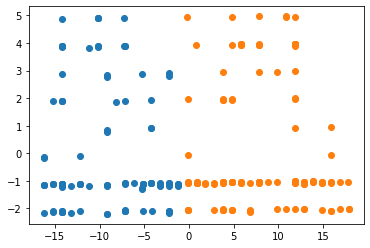

In [24]:
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.show()

In [25]:
# Invert the earlier dictonary between the keys and items
columns_invert1 = {}
columns_invert2 = {}
for k, v in columns_rename1.items():
    columns_invert1[v] = k

for k, v in columns_rename2.items():
    columns_invert2[v] = k
    
car_pred = car_pred.replace({'Make':columns_invert1})
car_pred = car_pred.replace({'Category':columns_invert2})

car_pred

,Year,Make,Price,Category,cluster
0,2021,Acura,26100,Sedan,1
1,2021,Acura,38400,SUV,1
2,2021,Acura,37500,Sedan,1
3,2021,Alfa Romeo,40350,Sedan,1
4,2021,Alfa Romeo,42350,SUV,1
...,...,...,...,...,...
235,2021,Volvo,40950,Wagon,0
236,2021,Volkswagen,25245,SUV,0
237,2021,Volvo,33700,SUV,0
238,2021,Volvo,41700,SUV,0


In [26]:
filtered_label0 = car_pred[car_pred['cluster'] == 0]
filtered_label1 = car_pred[car_pred['cluster'] == 1]

Text(0.5, 1.0, 'Cluster Distribution')

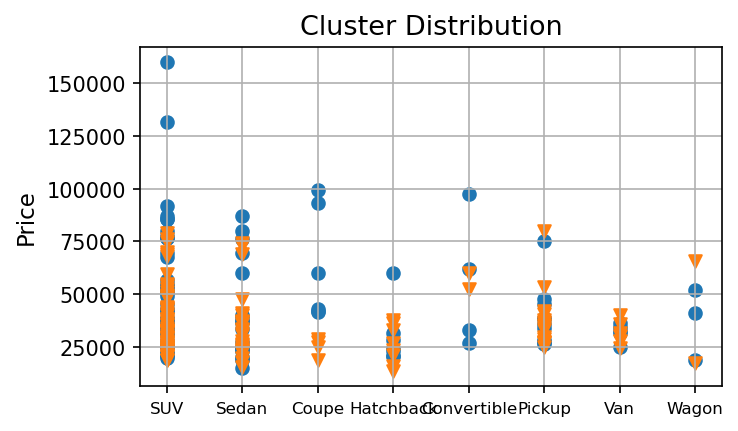

In [27]:
fs = 11

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,3), dpi = 150,)
plt.scatter(filtered_label0['Category'], filtered_label0['Price'], marker='o')
plt.scatter(filtered_label1['Category'], filtered_label1['Price'], marker='v')
plt.grid(True)
#plt.xlabel('',fontsize=fs)
plt.xticks(fontsize=fs-3)
plt.ylabel('Price',fontsize=fs)
plt.title('Cluster Distribution',fontsize=fs+2)